In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
olympic_df = pd.read_csv('../Resources/Machine_Learning_datasetv2.csv')
olympic_df = olympic_df.drop(['Unnamed: 0', 'athlete_count_y'], axis=1)
olympic_df = olympic_df.rename(columns={'GDP per capita': 'gdp_per_capita'})
winter_olympic_df = olympic_df[olympic_df['Season'] == 'Winter']
winter_olympic_df

,NOC,Year,Season,Host,athlete_count_x,Population,gdp_per_capita,Gold,Silver,Bronze,country_medal_total,olympic_total,medal_share,athlete_share
1611,ALB,2006,Winter,0,3,2992547.0,7347.33,0.0,0.0,0.0,0.0,252.0,0.000000,0.000905
1612,ALG,2006,Winter,0,3,33641007.0,10385.78,0.0,0.0,0.0,0.0,252.0,0.000000,0.000905
1613,ARG,2006,Winter,0,17,39289876.0,16490.47,0.0,0.0,0.0,0.0,252.0,0.000000,0.005128
1614,ARM,2006,Winter,0,8,2958301.0,8798.75,0.0,0.0,0.0,0.0,252.0,0.000000,0.002413
1615,AUS,2006,Winter,0,40,20697900.0,42650.99,1.0,0.0,1.0,2.0,252.0,0.007937,0.012066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,TUR,2002,Winter,0,5,65145357.0,11753.95,0.0,0.0,0.0,0.0,234.0,0.000000,0.001605
2499,UKR,2002,Winter,0,79,48202470.0,6262.98,0.0,0.0,0.0,0.0,234.0,0.000000,0.025353
2500,USA,2002,Winter,1,232,287625193.0,46266.30,10.0,13.0,11.0,34.0,234.0,0.145299,0.074454
2501,UZB,2002,Winter,0,6,25271850.0,4777.29,0.0,0.0,0.0,0.0,234.0,0.000000,0.001926


In [3]:
# Removing 2016
winter_olympics_test_df = winter_olympic_df[winter_olympic_df['Year'] != '2014']

In [4]:
# Winter olympics machine learning dataframe
winter_olympics_test_df = winter_olympics_test_df.drop(['NOC', 'Year', 'Season', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total'], axis=1)
winter_olympics_test_df

,Host,Population,gdp_per_capita,medal_share,athlete_share
1611,0,2992547.0,7347.33,0.000000,0.000905
1612,0,33641007.0,10385.78,0.000000,0.000905
1613,0,39289876.0,16490.47,0.000000,0.005128
1614,0,2958301.0,8798.75,0.000000,0.002413
1615,0,20697900.0,42650.99,0.007937,0.012066
...,...,...,...,...,...
2498,0,65145357.0,11753.95,0.000000,0.001605
2499,0,48202470.0,6262.98,0.000000,0.025353
2500,1,287625193.0,46266.30,0.145299,0.074454
2501,0,25271850.0,4777.29,0.000000,0.001926


In [5]:
# independent and dependent variables
X = winter_olympics_test_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
y = winter_olympics_test_df[['medal_share']]

In [6]:
# Create and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5370790090948283
Testing Score: 0.6522222018204503


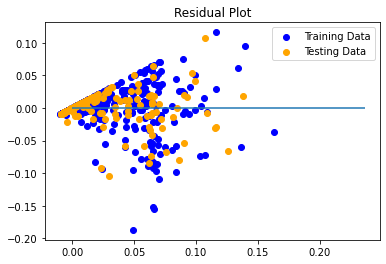

In [7]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()


In [8]:
# 2016 predicted dataset
winter_olympic_predicted_df = winter_olympic_df[winter_olympic_df['Year'] != '2014']
winter_olympic_predicted_df = winter_olympic_predicted_df.drop(['NOC', 'Year', 'Season', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total', 'medal_share'], axis=1)
winter_olympic_predicted_df = winter_olympic_predicted_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
winter_olympic_predicted_df

,Population,gdp_per_capita,Host,athlete_share
1611,2992547.0,7347.33,0,0.000905
1612,33641007.0,10385.78,0,0.000905
1613,39289876.0,16490.47,0,0.005128
1614,2958301.0,8798.75,0,0.002413
1615,20697900.0,42650.99,0,0.012066
...,...,...,...,...
2498,65145357.0,11753.95,0,0.001605
2499,48202470.0,6262.98,0,0.025353
2500,287625193.0,46266.30,1,0.074454
2501,25271850.0,4777.29,0,0.001926


In [9]:
# Predictions
winter_predictions = model.predict(winter_olympic_predicted_df)
winter_predictions.tolist()
winter_predictions.astype(int)
winter_predictions

array([[-6.82090383e-03],
       [-5.71577543e-03],
       [ 1.41664224e-03],
       [-4.54108051e-03],
       [ 1.90871338e-02],
       [ 4.21336884e-02],
       [-6.13653872e-03],
       [ 5.85977687e-03],
       [-4.33524283e-03],
       [ 1.57952971e-02],
       [-3.18240632e-03],
       [ 8.41486090e-03],
       [ 8.10472821e-02],
       [ 1.26284001e-03],
       [ 1.25555236e-03],
       [ 3.47993786e-02],
       [-6.21855177e-03],
       [ 1.06263335e-02],
       [ 1.20336776e-04],
       [ 4.01075136e-02],
       [ 7.03385262e-03],
       [ 1.09313673e-02],
       [ 1.66294983e-02],
       [-9.93435726e-03],
       [ 3.31483980e-02],
       [ 5.01899202e-02],
       [ 1.98402434e-02],
       [-6.45356145e-03],
       [ 6.27301817e-02],
       [ 2.42716736e-03],
       [ 5.26541231e-03],
       [ 6.28681761e-03],
       [-8.01481071e-03],
       [ 1.00608916e-02],
       [ 7.87021159e-03],
       [ 1.30370685e-03],
       [ 9.70844203e-02],
       [ 5.78827274e-02],
       [ 1.7

In [10]:
winter_olympic_predicted_df['medal_share_predicted'] = winter_predictions.tolist()
winter_olympic_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted
1611,2992547.0,7347.33,0,0.000905,[-0.006820903828830484]
1612,33641007.0,10385.78,0,0.000905,[-0.00571577543126001]
1613,39289876.0,16490.47,0,0.005128,[0.001416642244481476]
1614,2958301.0,8798.75,0,0.002413,[-0.004541080513274082]
1615,20697900.0,42650.99,0,0.012066,[0.019087133793710506]
...,...,...,...,...,...
2498,65145357.0,11753.95,0,0.001605,[-0.004416524534752673]
2499,48202470.0,6262.98,0,0.025353,[0.021049425478654942]
2500,287625193.0,46266.30,1,0.074454,[0.11616191175707916]
2501,25271850.0,4777.29,0,0.001926,[-0.006596399431695104]
